In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
df1 = pd.read_excel("/content/gdrive/MyDrive/Datasets/Liarr.xlsx")
df2 = pd.read_excel("/content/gdrive/MyDrive/Datasets/ISOT.xlsx")
df3 = pd.read_excel("/content/gdrive/MyDrive/Datasets/Covid-2.xlsx")
df4 = pd.read_excel("/content/gdrive/MyDrive/Datasets/GeorgeMcIntire.xlsx")

In [ ]:
df1 = df1.drop(columns=['ID', 'Subject', 'Speaker', 'Job', 'State', 'Party', 'BTC', 'FC', 'HTC', 'MTC', 'POFC', 'Context','Type'])
df2 = df2.drop(columns=['title', 'subject', 'date'])
df3 = df3.drop(columns=['id', 'Type'])
df4 = df4.drop(columns=['id', 'ID', 'title'])

In [ ]:
df1.rename(columns = {'Statement':'Text'}, inplace = True)
df2.rename(columns = {'text':'Text', 'Type':'Label'}, inplace = True)
df3.rename(columns = {'tweet':'Text', 'label':'Label'}, inplace = True)
df4.rename(columns = {'text':'Text', 'label':'Label'}, inplace = True)

In [ ]:
#Data preparation and Visualization
print ("df1 dimention is: ", df1.shape, "\n", "df1 columns name are :", df1.columns, "\n", "Label distribution is: \n", df1['Label'].value_counts(), "\n", "Average length is: ", df1['Text'].str.len().mean(), "\n", "###############")
print ("df2 dimention is: ", df2.shape, "\n", "df2 columns name are :", df2.columns, "\n", "Label distribution is: \n", df2['Label'].value_counts(), "\n", "Average length is: ", df2['Text'].str.len().mean(), "\n", "###############")
print ("df3 dimention is: ", df3.shape, "\n", "df3 columns name are :", df3.columns, "\n", "Label distribution is: \n", df3['Label'].value_counts(), "\n", "Average length is: ", df3['Text'].str.len().mean(), "\n", "###############")
print ("df4 dimention is: ", df4.shape, "\n", "df4 columns name are :", df4.columns, "\n", "Label distribution is: \n", df4['Label'].value_counts(), "\n", "Average length is: ", df4['Text'].str.len().mean(), "\n", "###############")

df1 dimention is:  (12836, 2) 
 df1 columns name are : Index(['Label', 'Text'], dtype='object') 
 Label distribution is: 
 3    2638
1    2511
4    2466
2    2108
5    2063
0    1050
Name: Label, dtype: int64 
 Average length is:  106.34917419756934 
 ###############
df2 dimention is:  (44865, 2) 
 df2 columns name are : Index(['Text', 'Label'], dtype='object') 
 Label distribution is: 
 0    23448
1    21417
Name: Label, dtype: int64 
 Average length is:  2459.3467290761173 
 ###############
df3 dimention is:  (10700, 2) 
 df3 columns name are : Index(['Text', 'Label'], dtype='object') 
 Label distribution is: 
 1    5600
0    5100
Name: Label, dtype: int64 
 Average length is:  181.97981308411215 
 ###############
df4 dimention is:  (6309, 2) 
 df4 columns name are : Index(['Text', 'Label'], dtype='object') 
 Label distribution is: 
 1    3159
0    3150
Name: Label, dtype: int64 
 Average length is:  4592.633697891901 
 ###############


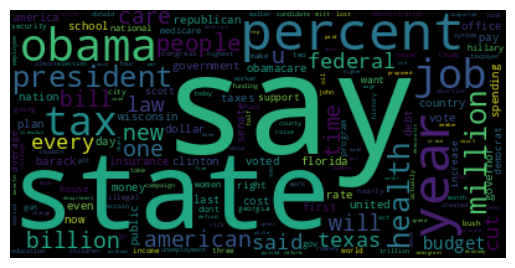

#####################


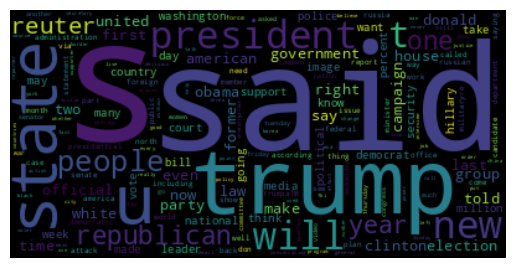

#####################


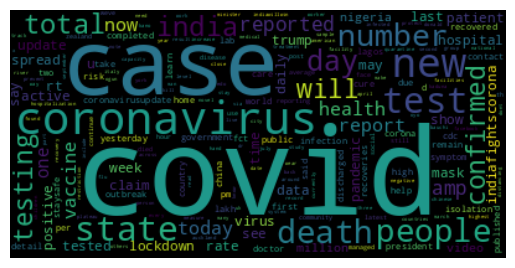

#####################


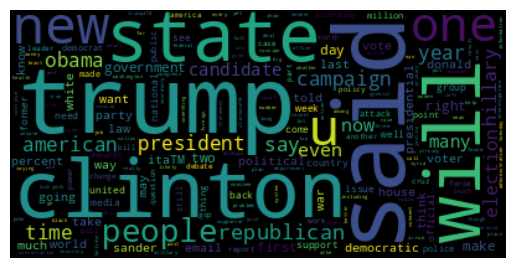

In [ ]:
#WordCloud
text1 = " ".join(t for t in df1.Text)
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(text1)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('word_cloud1.pdf', dpi=1000)
plt.show()
print("#####################")
text2 = " ".join(t for t in df2.Text)
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(text2)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('word_cloud2.pdf', dpi=1000)
plt.show()
print("#####################")
text3 = " ".join(t for t in df3.Text)
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(text3)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('word_cloud3.pdf', dpi=1000)
plt.show()
print("#####################")
text4 = " ".join(t for t in df4.Text)
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(text4)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('word_cloud4.pdf', dpi=1000)
plt.show()

**Section.2: Pre-Processing**

In [ ]:
#Download Dicts
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
def lowercase(Text):
    lower_text = Text.lower()
    return lower_text

In [ ]:
import re
def Clean(text):
    # Removendo URLS
    new_text = re.sub(r"http\S+", " ", text)
    # Removendo RT
    new_text = re.sub('RT @[\w_]+: ', ' ', new_text)
    # Removendo tags
    new_text = re.sub(r"@\S+", " ", new_text)
    # removing special characters
    new_text = normalize('NFKD', new_text).encode('ASCII', 'ignore').decode('ASCII')
    new_text = re.sub('[0-9]', ' ', str(new_text))
    new_text = re.sub('\s+', ' ', new_text)
    return new_text

In [ ]:
def remove_punctuation(Text):
    punctuationfree="".join([i for i in Text if i not in string.punctuation])
    return punctuationfree

In [ ]:
def remove_whitespace(Text):
    whitespacefree = Text.strip()
    return whitespacefree

In [ ]:
def remove_stopwords(Text):
    stopwords = nltk.corpus.stopwords.words('english')
    clean_text = [word for word in Text if word not in stopwords]
    return clean_text

In [ ]:
def stemmer(Text):
    stemmer = PorterStemmer()
    stem_text = [stemmer.stem(w) for w in Text]
    return stem_text

In [ ]:
def lemmatizer(Text):
    lemmatizer = WordNetLemmatizer()
    lemm_text = [lemmatizer.lemmatize(w) for w in Text]
    return lemm_text

In [ ]:
def remove_emoji(Text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [ ]:
def remove_emoticons(Text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', Text)

In [ ]:
df1['Text'] = df1['Text'].apply(lambda x: lowercase(x))
df1['Text'] = df1['Text'].apply(lambda x: Clean(x))
df1['Text'] = df1['Text'].apply(lambda x: remove_punctuation(x))
df1['Text'] = df1['Text'].apply(lambda x: remove_whitespace(x))
df1["Text"] = df1["Text"].apply(lambda x: remove_emoji(x))
df1["Text"] = df1["Text"].apply(lambda x: remove_emoticons(x))
df1["Token"] = df1["Text"].apply(word_tokenize)
df1["Token"] = df1["Token"].apply(lambda x: remove_stopwords(x))
df1["Token"] = df1["Token"].apply(lambda x: stemmer(x))
df1["Token"] = df1["Token"].apply(lambda x: lemmatizer(x))
print("Pre-processed dataset-1")
#########################################################################
df2['Text'] = df2['Text'].apply(lambda x: lowercase(x))
df2['Text'] = df2['Text'].apply(lambda x: Clean(x))
df2['Text'] = df2['Text'].apply(lambda x: remove_punctuation(x))
df2['Text'] = df2['Text'].apply(lambda x: remove_whitespace(x))
df2["Text"] = df2["Text"].apply(lambda x: remove_emoji(x))
df2["Text"] = df2["Text"].apply(lambda x: remove_emoticons(x))
df2["Token"] = df2["Text"].apply(word_tokenize)
df2["Token"] = df2["Token"].apply(lambda x: remove_stopwords(x))
df2["Token"] = df2["Token"].apply(lambda x: stemmer(x))
df2["Token"] = df2["Token"].apply(lambda x: lemmatizer(x))
print("Pre-processed dataset-2")
########################################
df3['Text'] = df3['Text'].apply(lambda x: lowercase(x))
df3['Text'] = df3['Text'].apply(lambda x: Clean(x))
df3['Text'] = df3['Text'].apply(lambda x: remove_punctuation(x))
df3['Text'] = df3['Text'].apply(lambda x: remove_whitespace(x))
df3["Text"] = df3["Text"].apply(lambda x: remove_emoji(x))
df3["Text"] = df3["Text"].apply(lambda x: remove_emoticons(x))
df3["Token"] = df3["Text"].apply(word_tokenize)
df3["Token"] = df3["Token"].apply(lambda x: remove_stopwords(x))
df3["Token"] = df3["Token"].apply(lambda x: stemmer(x))
df3["Token"] = df3["Token"].apply(lambda x: lemmatizer(x))
print("Pre-processed dataset-3")
##############################################
df4['Text'] = df4['Text'].apply(lambda x: lowercase(x))
df4['Text'] = df4['Text'].apply(lambda x: Clean(x))
df4['Text'] = df4['Text'].apply(lambda x: remove_punctuation(x))
df4['Text'] = df4['Text'].apply(lambda x: remove_whitespace(x))
df4["Text"] = df4["Text"].apply(lambda x: remove_emoji(x))
df4["Text"] = df4["Text"].apply(lambda x: remove_emoticons(x))
df4["Token"] = df4["Text"].apply(word_tokenize)
df4["Token"] = df4["Token"].apply(lambda x: remove_stopwords(x))
df4["Token"] = df4["Token"].apply(lambda x: stemmer(x))
df4["Token"] = df4["Token"].apply(lambda x: lemmatizer(x))

print("Pre-processed dataset-4")

Pre-processed dataset-1
Pre-processed dataset-2
Pre-processed dataset-3
Pre-processed dataset-4


***Data Segmentation***

In [ ]:
#Segmentation for Model Evaluation
df1_train, df1_test, df1_train_class, df1_test_class = train_test_split(df1['Text'], df1['Label'], test_size=0.25, random_state=42)
df2_train, df2_test, df2_train_class, df2_test_class = train_test_split(df2['Text'], df2['Label'], test_size=0.25, random_state=42)
df3_train, df3_test, df3_train_class, df3_test_class = train_test_split(df3['Text'], df3['Label'], test_size=0.25, random_state=42)
df4_train, df4_test, df4_train_class, df4_test_class = train_test_split(df4['Text'], df4['Label'], test_size=0.25, random_state=42)